# <center> Financial Risk Analysis in Python - Apple and S&P 500

#### the  Scenario:

ABC Company is about to buy shares of Apple and S&P 500 with the target to obtain optimum profit in the span of two years.
But they are curious how the two companies have been performing for three years.

So the manager approaches you as a Data Analyst in ABC company, please can we know how the Apple and S&P 500 stock market have been for the past
three years? We would like to know if the rusk is minimal or unaffordable for us.

this is a real scenario! 

https://www.youtube.com/watch?v=DBasmyYc-i4

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt 
import yfinance as yf
import pyfolio 
%matplotlib inline


c:\Users\ACER\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
c:\Users\ACER\anaconda3\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
symbol= "AAPL"
start_date="2020-01-01"
end_date="2023-12-31"
data= yf.download(symbol,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582657,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200


In [4]:
# Percentage change
data["Returns"]=data["Adj Close"].pct_change()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349144,146322800,-0.009722
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200,0.007968
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582657,108872000,-0.004703
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200,0.016086


In [5]:
volatility = np.std(data["Returns"])
volatility

0.02113540159692016

In [6]:
market_data=yf.download("^GSPC",start=start_date,end=end_date)
market_data["Returns"]=market_data["Adj Close"].pct_change()
data=data.join(market_data["Adj Close"],on=data.index,rsuffix="_Market")
data["Returns_Market"]=data["Adj Close_Market"].pct_change()
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market,Returns_Market
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400,NaN,3257.850098,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349144,146322800,-0.009722,3234.850098,-0.007060
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200,0.007968,3246.280029,0.003533
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582657,108872000,-0.004703,3237.179932,-0.002803
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200,0.016086,3253.050049,0.004902


In [7]:
cov_matrix=np.cov(data["Returns"].dropna(),data["Returns_Market"].dropna())

beta=cov_matrix[0,1]/cov_matrix[1,1]
beta,cov_matrix

(1.1896770748470682,
 array([[0.00044715, 0.00025003],
        [0.00025003, 0.00021017]]))

In [8]:
sharper_ratio=data["Returns"].mean()/volatility
sharper_ratio

0.05614121641932259

In [9]:
data["Week Returns"]=data["Returns"].rolling(7).mean()
data["Monthly Returns"]=data["Returns"].rolling(30).mean()

#data.head(35)

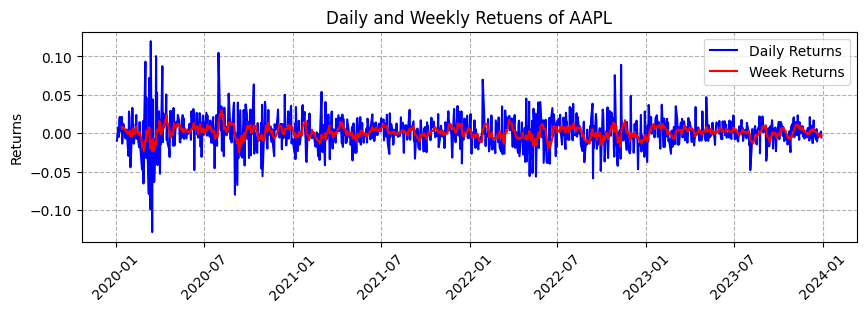

In [15]:
plt.figure(figsize=(10,6))

#Plotting Returns
plt.subplot(2,1,1)
plt.plot(data.index,data["Returns"],label="Daily Returns",color="blue")
plt.plot(data.index,data["Week Returns"],label="Week Returns",color="red")
plt.title("Daily and Weekly Retuens of {}".format(symbol))
plt.ylabel("Returns")
plt.grid(linestyle="--")
plt.xticks(rotation=45)
plt.legend()
plt.show()